# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np # module for numerical work
from scipy import optimize # module for optimizing
from matplotlib import pyplot as plt # module for visualization
plt.style.use("seaborn") # formatting



# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [3]:

# %%
# parameter values as given
m = 1   # cash-on-hand
v = 10 # scalar for disutility of labor
epsilon = 0.3 # Frisch elasticity
tau_0 = 0.4 # standard labor income tax
tau_1 = 0.1 # top bracket labor income tax
k = 0.4 # cut-off for top labor income tax

# utility function 
def utility(c,v,l,epsilon):
    u_out = np.log(c) - v* ((l**(1+1/epsilon))/(1+1/epsilon)) # as given
    return u_out

# budget constraint
def budget_constraint(m,w,l,tau_0,tau_1,k):
    b_out = m + (w*l) - (tau_0*w*l  +tau_1*np.fmax(w*l-k , 0)) # as given
    return b_out

# equilibrium
def equilibrium(l, w, epsilon, v, tau_0, tau_1, k):
    c = budget_constraint(m,w,l,tau_0,tau_1,k)  # as utility is monotonically increasing in consumption
    return -utility(c,v,l,epsilon)


# call solver
def solve(w, epsilon, v, tau_0, tau_1, k, m): 
    solution = optimize.minimize_scalar(
    equilibrium,  method='bounded',
    bounds=(0, 1), args=(w,epsilon, v, tau_0,tau_1,k)) # maximization of equilibrium

    # solution
    l_star = solution.x
    c_star = budget_constraint(m, w, l_star,tau_0,tau_1,k)
    u_star = utility(c_star,v,l_star,epsilon)
    return l_star,c_star,u_star

l_star = solve(0.5, epsilon, v , tau_0, tau_1, k, m)[0]

c_star = solve(0.5, epsilon, v , tau_0, tau_1, k, m)[1]    

u_star = solve(0.5, epsilon, v , tau_0, tau_1, k, m)[2]        

print("The optimal units of labor is: " + str(l_star))
print("The optimal units of consumption is: " + str(c_star))
print("The maximum utility is: " + str(u_star))


The optimal units of labor is: 0.33924126400854654
The optimal units of consumption is: 1.101772379202564
The maximum utility is: 0.07560365728425235


# Question 2

ADD ANSWER.

<function show at 0x000002FBE9995EE8>


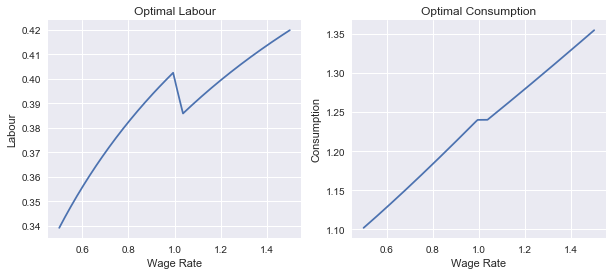

In [17]:


# set of vector values
N = 10000
wage_range = np.linspace(0.5, 1.5, N) # simulating 10.000 individuals uniformally distributed in range
labour_range = np.empty(N)
consumption_range = np.empty(N)

# Looping values through solver, to create plot
for i, w in enumerate(wage_range):
    sol = solve(w, epsilon, v, tau_0, tau_1, k, m) # looping individuals through our maximization from q1
    labour_range[i] = sol[0]
    consumption_range[i] = sol[1]

figure = plt.figure(figsize=(10,4)) # creating figure with 2 subplots for variables of interest

# left plot - labor
ax_left = figure.add_subplot(1,2,1)
ax_left.plot(wage_range, labour_range)
ax_left.set_title("Optimal Labour")
ax_left.set_xlabel("Wage Rate")
ax_left.set_ylabel("Labour")
ax_left.grid(True)



# right plot - consumption
ax_right = figure.add_subplot(1,2,2)
ax_right.plot(wage_range, consumption_range)
ax_right.set_title("Optimal Consumption")
ax_right.set_xlabel("Wage Rate")
ax_right.set_ylabel("Consumption")
ax_right.grid(True)

# print of results
print(plt.show)




# Question 3

ADD ANSWER.

In [5]:
def totaltax(tau_0, wage_range, labour_range, tau_1, k):


    total_tax_revenue = np.sum(tau_0 * wage_range * labour_range + tau_1*np.fmax (wage_range*labour_range-k,0))
    return total_tax_revenue

# print of results    
print(f'The total tax revenue is =  {totaltax(tau_0, wage_range, labour_range, tau_1, k):.2f}')

The total tax rate is =  1630.19


# Question 4

ADD ANSWER.

In [18]:
# creating empty parameter vectors
labour_range_updated = np.empty(N)
consumption_range_updated = np.empty(N)
epsilon_updated = 0.1 

# Looping values of c,l through solver
for i, w in enumerate(wage_range):
    sol = solve(w, epsilon_updated, v, tau_0, tau_1, k, m)
    labour_range_updated[i] = sol[0]
    consumption_range_updated[i] = sol[1]


# print of results
print(f'The total tax revenue is =  {totaltax(tau_0, wage_range, labour_range_updated, tau_1, k):.2f} for epsilon = 0.1')



The total tax revenue is =  3196.88 for epsilon = 0.1


# Question 5

In [19]:
def tax_revenue(vec):

    tau_0 = vec[0]
    tau_1 = vec[1]
    k = vec[2]
    w = vec[3]
    l = vec[4]
    rev = np.sum(tau_0 * w * l + tau_1*np.fmax(w*l-k,0))
    return  rev

def new_budget_constraint(vec):

    tau_0 = vec[0]
    tau_1 = vec[1]
    k = vec[2]
    new_bc = m + vec[3] * vec[4] - (vec[0]*vec[3]*vec[4]+vec[1]*(np.fmax(vec[3]*vec[4]-vec[2] , 0 )))
    return new_bc
    
def tax_optimal(vec):

    w = vec[3]
    l = vec[4]
    con = new_budget_constraint(vec)
    return -tax_revenue(vec)

#  total tax optimizer
initial_guess = [0.4 , 0.1 , 0.4 , 1 , 0.4]
bounds = ((0.00001,0.99999) , (0.00001,0.99999) , (0.00001,0.99999) , (0.00001,1.5) , (0.00001,0.99999))
constraint = ({"type":"ineq","fun":new_budget_constraint})
 
result = optimize.minimize(tax_optimal , initial_guess , bounds=bounds , constraints=constraint , method="SLSQP")


# elements of result
tau_0_opt = result.x[0]
tau_1_opt = result.x[1]
k_opt = result.x[2]
w_opt = result.x[3]
l_opt = result.x[4]
tax_opt = np.sum(totaltax(w_opt , l_opt , tau_0_opt , tau_1_opt , k_opt))

# print of results

print(f'Standard labour income tax: {tau_0_opt*100:.1f}%')
print(f'Top bracket labour income tax: {tau_1_opt*100:.1f}%')
print(f'Cut-off for the top labour income: {k_opt:.3f}')
print(f'Total tax revenue: {tax_opt*10000:.1f} DKK')



Standard labour income tax: 99.2%
Top bracket labour income tax: 74.0%
Cut-off for the top labour income: 0.133
Total tax revenue: 21238.7 DKK


# Conclusion

We started this exercise be finding the optimal level of consumption, wage and labour supply with respect to the given set of parameters, ulitity functon and budget constraint. Speciffically, this was done by creating a solver mecanism, that maximized consumer utility subject to the budget constraint. These result are plotted in question 2, using the imported matplotlib-package. Given this optimal level of consumer choices, we found the total tax revenue by defining a function, that were also used, then the parameter value of epsilon were changed in question 4. Lastly, we created a new solver that optimized the total revenue with respect to the three parameters, that a social planner would be able to control, tau_0, tau_1 and kappa.